***SOUMYADEEP BANIK***<br>
***CS-2***

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [103]:
# fit a polynomial of order 6
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg=PolynomialFeatures(degree=6)
X=poly_reg.fit_transform(data_x)
poly_reg.fit(X,data_y)
lin_reg=LinearRegression()
lin_reg.fit(X,data_y)

LinearRegression()

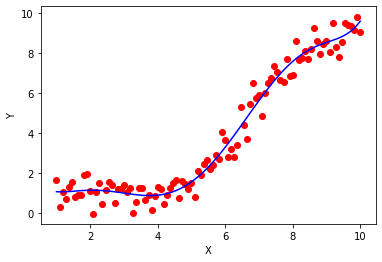

In [104]:
#X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(data_x,data_y,color='red')
plt.plot(data_x,lin_reg.predict(poly_reg.fit_transform(data_x)),color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [111]:
def cost(X, y, theta):
    m=len(X)
    y1 =np.sum(theta*X)
    return sum(np.sqrt((y1-data_y)**2))/(2*m)

In [119]:
# Implement gradient computation and theta update 
def gradient_descent(X, data_y, theta, alpha):
    y1 = np.sum(theta*X)
    for i in range(0, X.shape[0]):
        theta[i] = theta[i] - alpha*sum((y1-data_y)* X.iloc[:, i])/m
    return theta
#print(i)

In [ ]:
# Call stochastic gradient descent in the main loop
n = X.shape[0]
alpha = 0.9
sample_size = X.shape[1]
epochs = 700
theta = np.zeros(n)
costs = []
for i in range(epochs): 
    idx = np.random.choice(n, sample_size, replace= False)
    gradient_descent(idx, data_y, theta, alpha)
    cost_i = cost(X, y, theta)
    costs.append(cost_i)
return costs, theta

In [ ]:
# predict y_hat using test_x and theta 
# plot x vs y in blue
# plot x vs y_hat in red

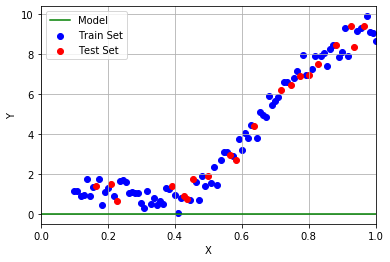

In [124]:
y_model = np.polyval(theta[::-1], np.linspace(0,1,100))
plt.plot(np.linspace(0,1,100), y_model, c='g', label='Model')
plt.scatter(train_x[:,1], train_y, c='b', label='Train Set')
plt.scatter(test_x[:,1], test_y, c='r', label='Test Set')
plt.grid()
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,1)
plt.show()